# 2.4 과거 10년 동안의 기상 데이터 분석하기# 

### 1. 기상 데이터 사용하기

기상 자료 개방 포털 > 종관 기상 관측

https://data.kma.go.kr/data/grnd/selectAsosReportList.do?pgmNo=135

위 링크를 통해 다운로드할 경우 회원가입을 거쳐야하며 ssl 인증 또한 제대로 안이루어져 있어 많은 불편함이 있으므로 아래의 것헙 주소에서 다운로드 할것!

https://github.com/rintiantta/book-mlearn-2/blob/master/ch2/weather/data.csv

In [39]:
import pandas as pd
import os.path

def load_tem10y_csv():
    in_file = "data/weather.csv"
    out_file = "data/tem10y.csv"
    
    # tem10y.csv 파일이 존재하지 않을경우에만 파일생성 작업 수행
    if not os.path.isfile(out_file):
        # CSV 파일을 한 줄 씩 읽어 들이기
        with open(in_file, "rt", encoding="EUC_KR") as fr:
            lines = fr.readlines()

        # 기존의 데이터를 분리해서 가공하기
        lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]  # 불필요한 헤더 제거
        lines = map(lambda v: v.replace('/', ','), lines)  # 하나의 값으로 표현된 '연/월/일'을 '연,월.일'과 같이 3개의 값으로 분리
        result = "".join(lines).strip()

        # 결과를 파일에 출력하기
        with open(out_file, "wt", encoding="utf-8") as fw:
            fw.write(result)
    
    return pd.read_csv("data/tem10y.csv")

In [40]:
load_tem10y_csv()

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
5,2006,1,6,2.1,8,1
6,2006,1,7,2.8,8,1
7,2006,1,8,4.2,8,1
8,2006,1,9,3.7,8,1
9,2006,1,10,4.3,8,1


### 2. 기온 평균 구하기

$ 평균 = \frac{데이터의 합계}{데이터의 수} $

In [46]:
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
df = pd.read_csv("data/tem10y.csv", encoding="utf-8")

# 날짜별 기온을 리스트에 넣기
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row['월']), int(row['일']), float(row['기온']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 날짜별 평균 구하기
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [49]:
# 11월 3일의 평균 기온
avs["11/3"]

15.48181818181818

### 3. 월별 평균 기온 구하기

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


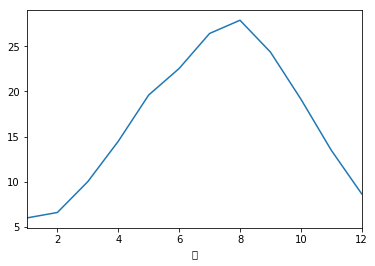

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽어 들이기
df = pd.read_csv("data/tem10y.csv", encoding="utf-8")

# 월별 평균 구하기
g = df.groupby(['월'])['기온']
gg = g.sum() / g.count()

# 결과 출력하기
print(gg)
gg.plot()
plt.show()

### 4. 기온이 30도 넘는 날 구하기 - Pandas 필터

연
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 연, dtype: int64


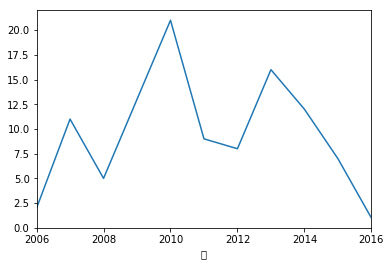

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 파일 읽어 들이기
df = pd.read_csv("data/tem10y.csv", encoding="utf-8")

# 온도가 30도를 넘는 데이터 확인하기 (30도가 넘으면 True 그 외에는 False 로 반환되는 배열 생성)
hot_bool = df["기온"] > 30

# 데이터 추출하기 (hot_bool 배열을 통해 True인 데이터만 추출)
hot = df[hot_bool]

# 연별로 세기
cnt = hot.groupby(["연"])["연"].count()

# 출력하기
print(cnt)
cnt.plot()
plt.show()

### 회귀 분석으로 내일 기온 예측하기

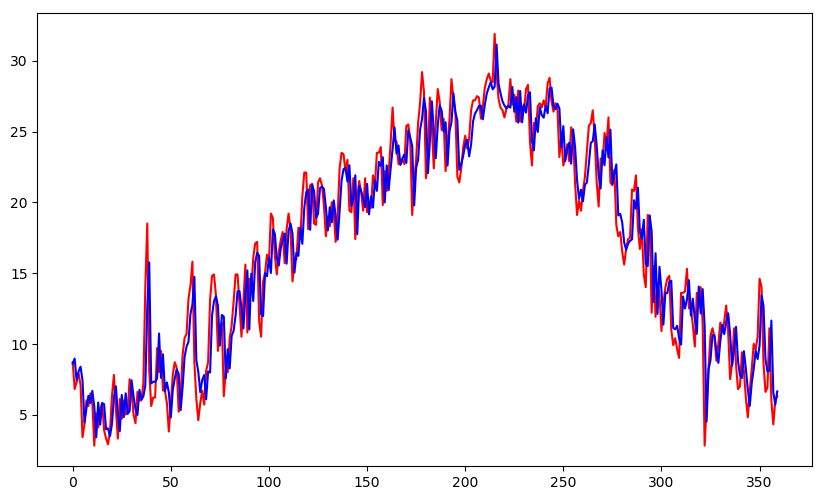

In [51]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기온 데이터 읽어 들이기
df = pd.read_csv("data/tem10y.csv", encoding="utf-8")

# 데이터를 학습 전용과 테스트 전용으로 분리하기
train_year = df["연"] <= 2015
test_year = df["연"] >= 2016
interval = 6

# 과거 6일의 데이터를 기반으로 학습할 데이터 만들기 (1주일을 기준으로 6일의 데이터로 7일째를 예측함. 즉, 7일째 기온이 label값이 됨)
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue # 첫 6개는 건너뛰기 (i + p - interval 값이 -로 가는것을 막기 위해)
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 직선 회귀 분석하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)  # 학습하기
pre_y = lr.predict(test_x)  # 예측하기

# 결과 그래프로 그리기
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c="r")
plt.plot(pre_y, c="b")
plt.show()

In [59]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))  # 평균 오차
print("max=", max(diff_y))  # 최대 오차

average= 1.6640684971954243
max= 8.471949619908472
